In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data distributed for every feature

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


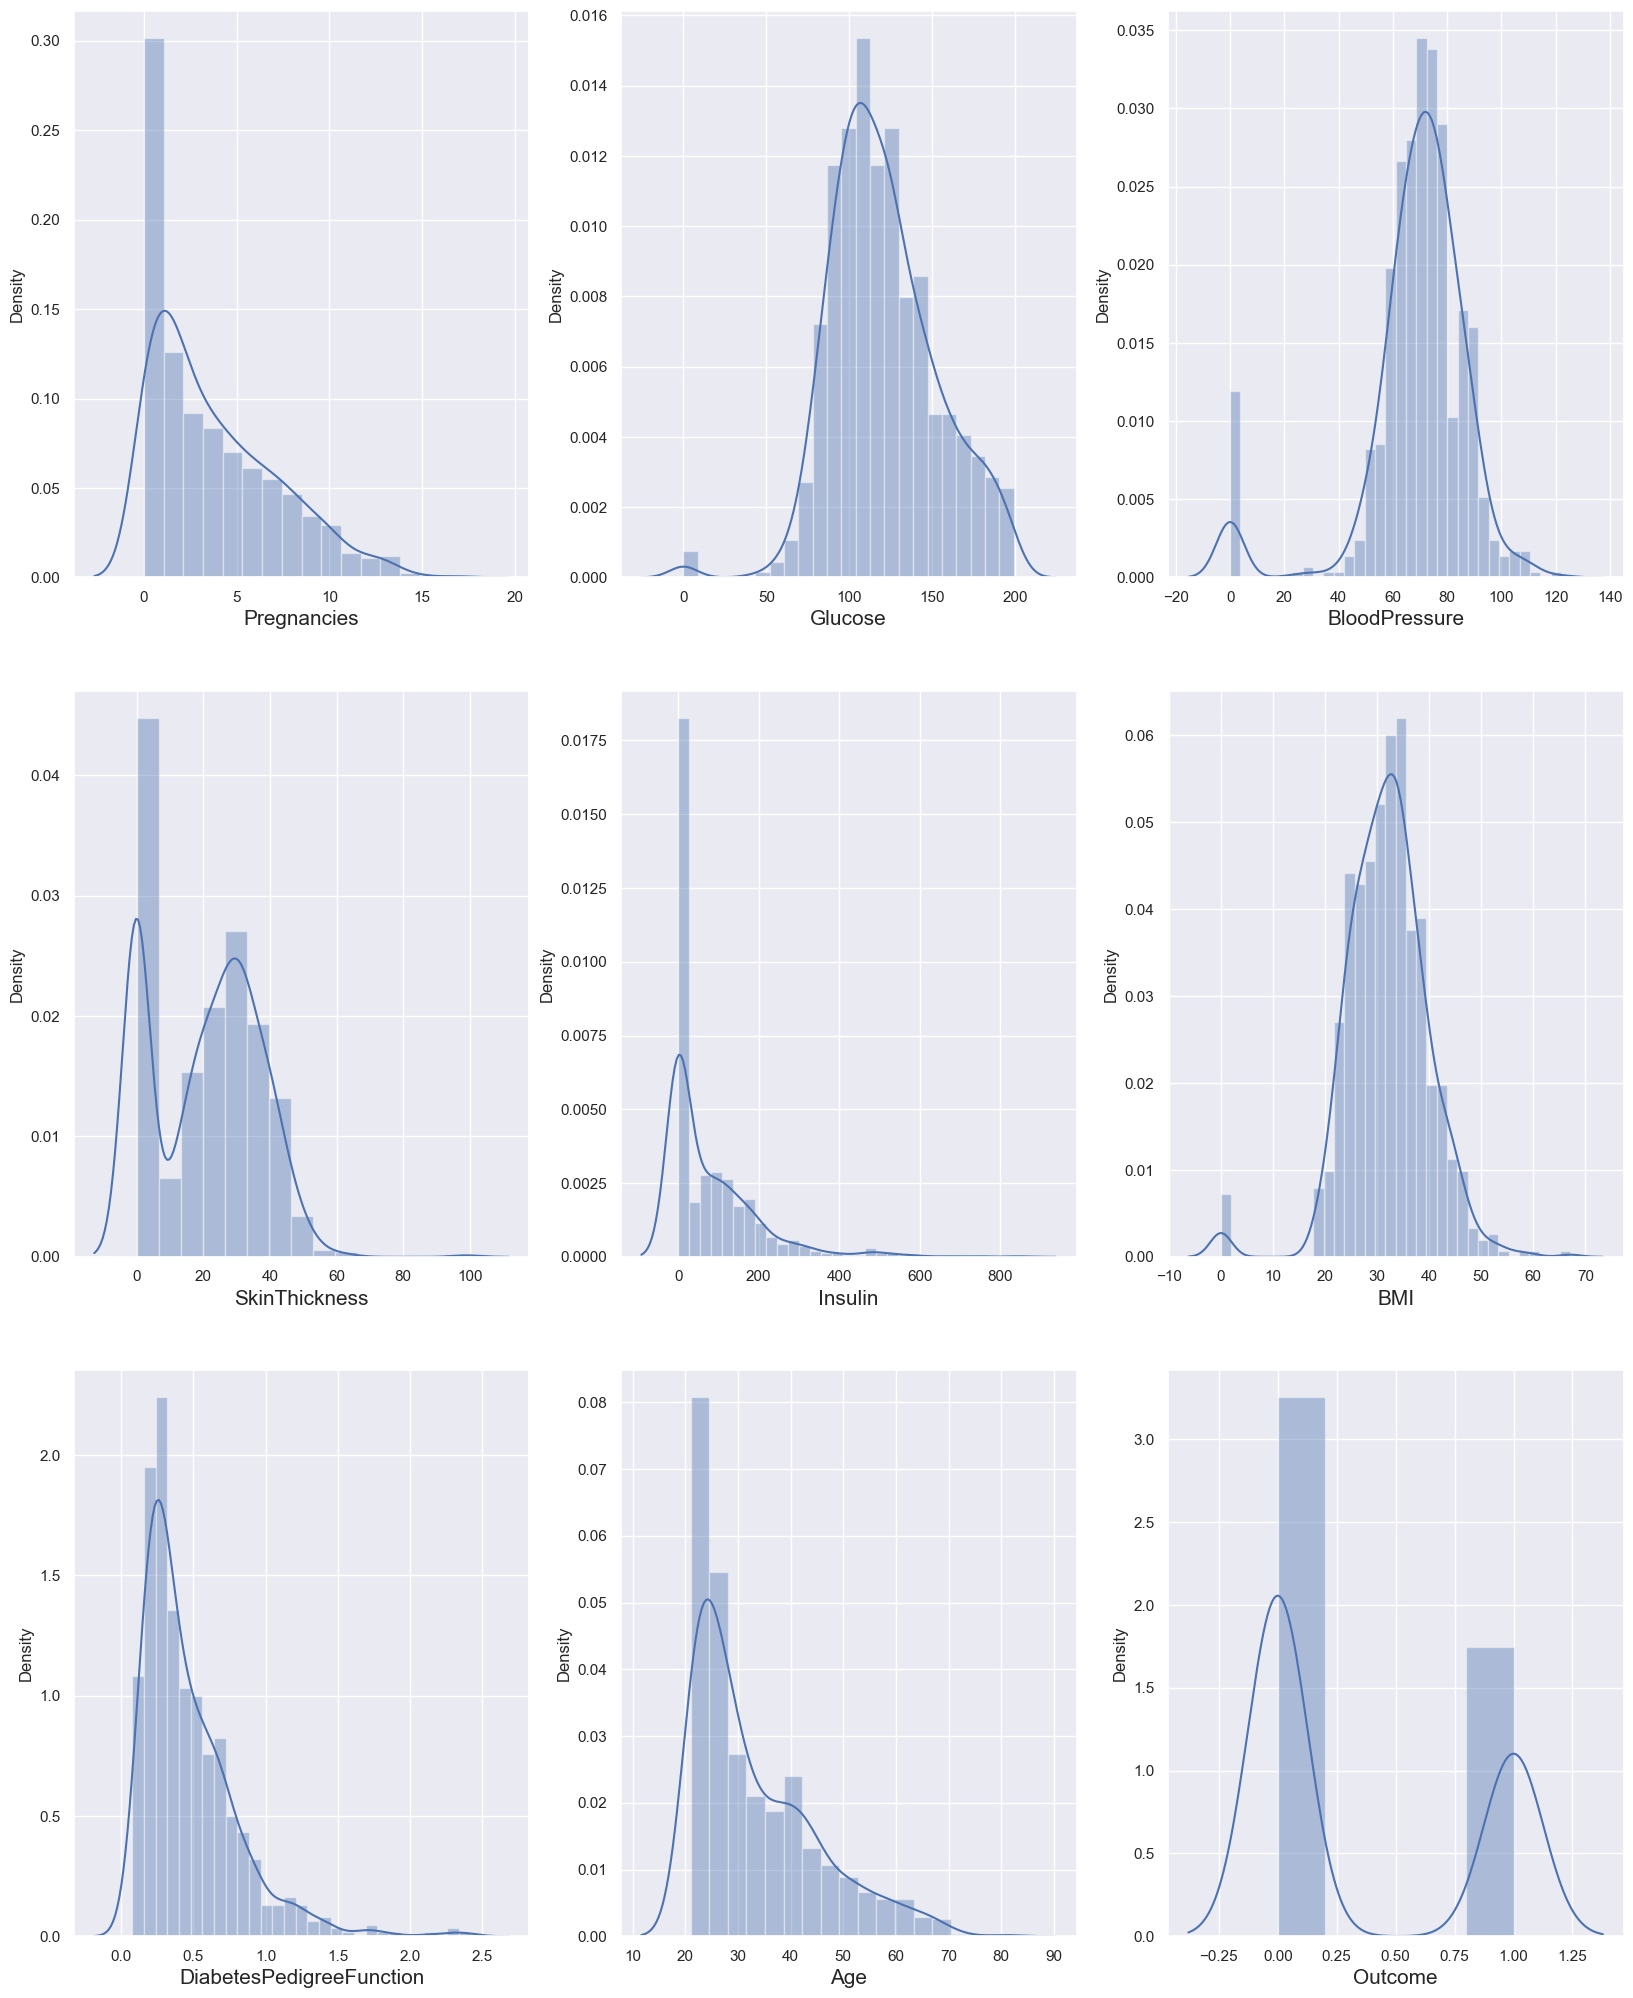

In [7]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

Glucose, Insulin, Skin Thickness, BMI and blood Pressure have value as 0 replacing them by thier mean values.

In [8]:
a=['BMI','BloodPressure','Glucose','Insulin','SkinThickness']
for i in a:
    df[i]=df[i].replace(0,df[i].mean())

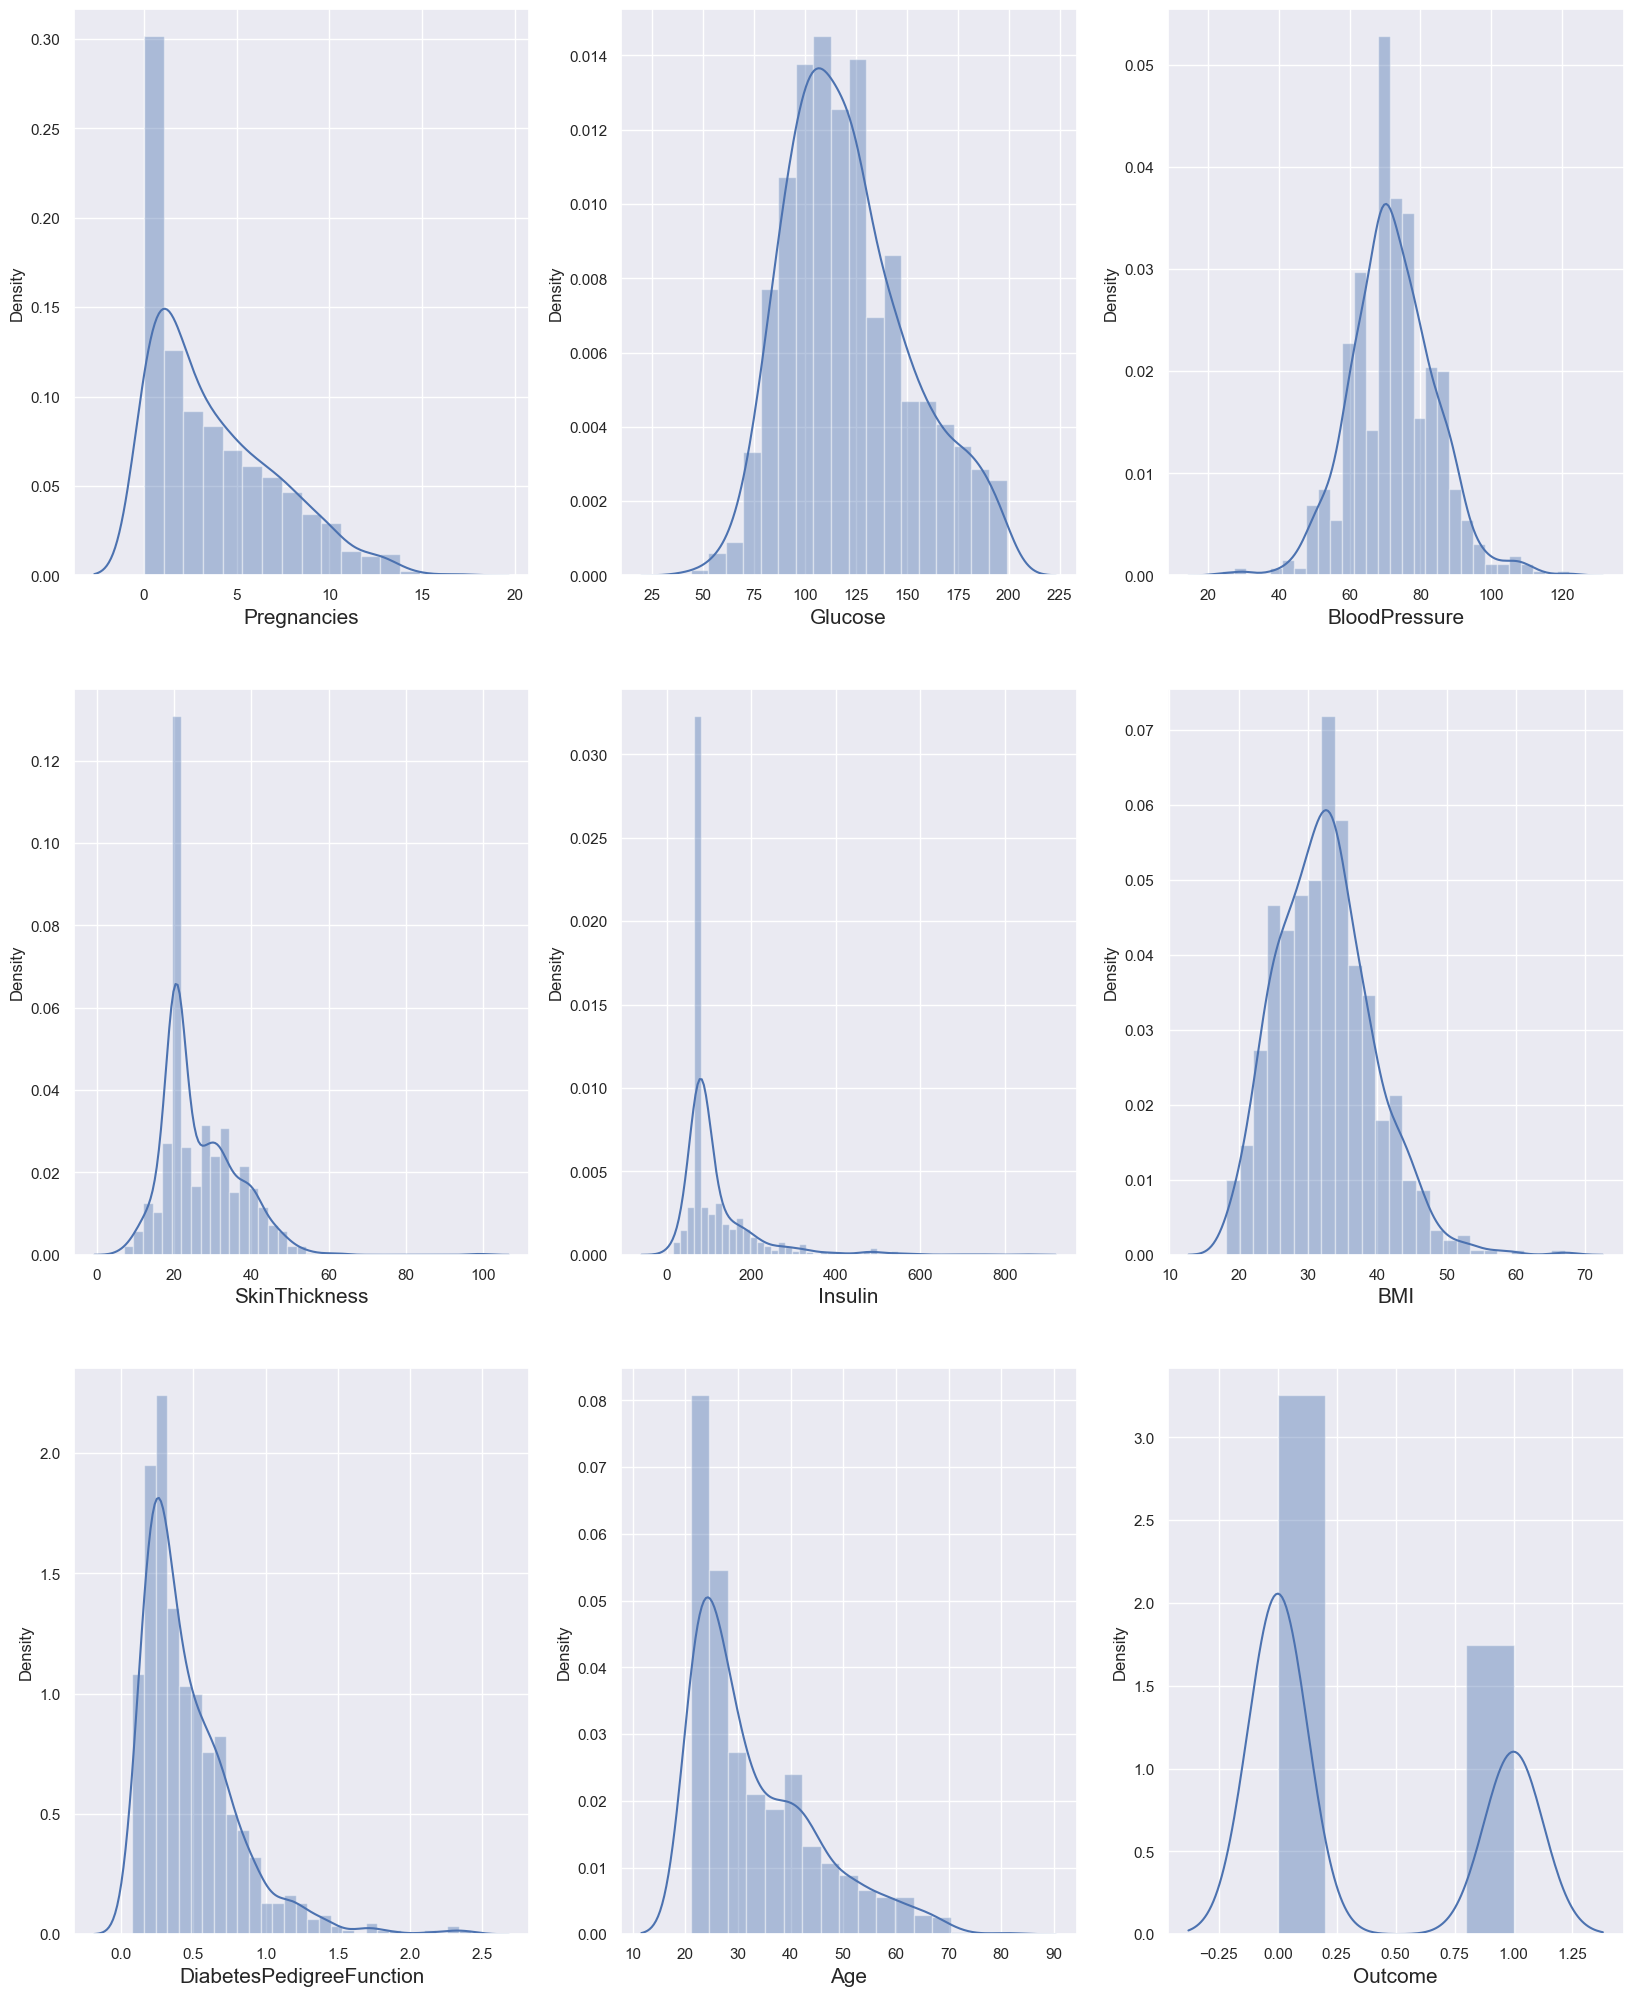

In [9]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

# checking outliers

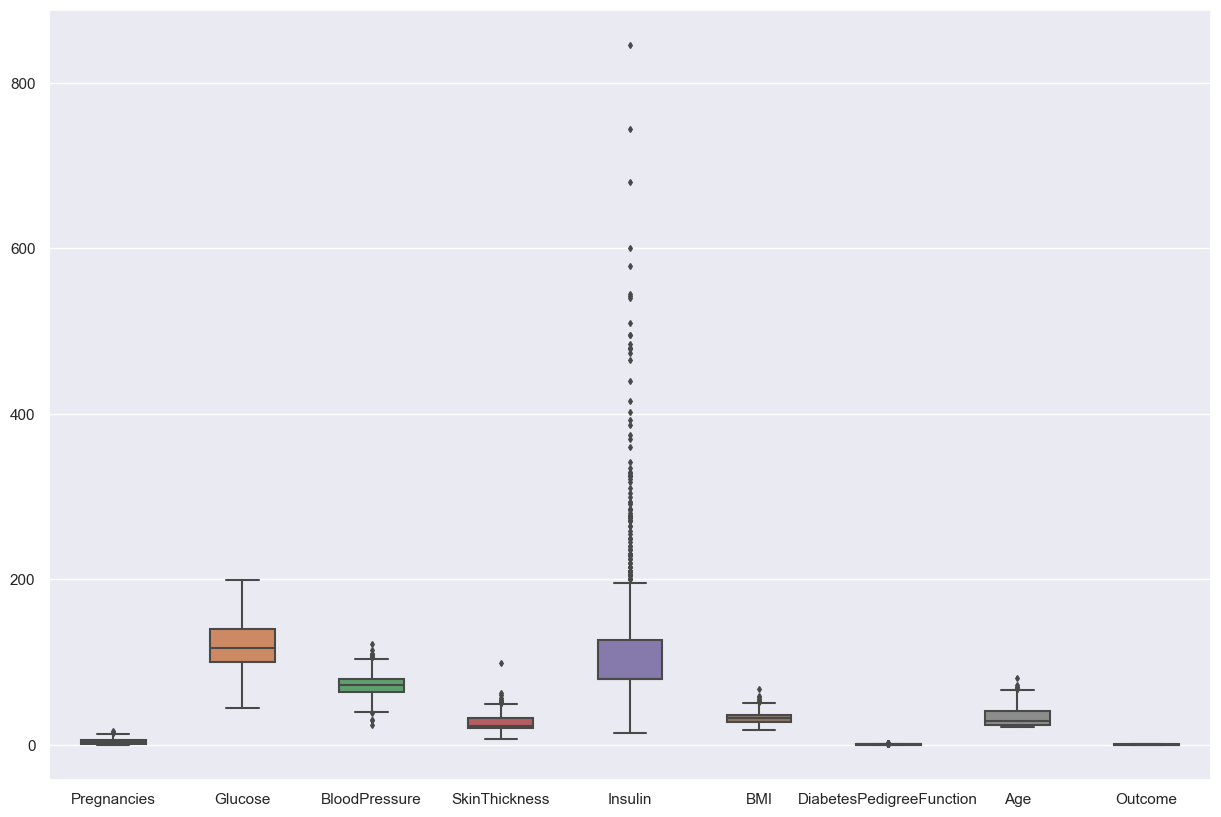

In [10]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data =df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [11]:
# removing the top 2% data from the pregnancies column
outlier = df['Pregnancies'].quantile(0.98)
df = df[df['Pregnancies']<outlier]

In [12]:
# removing the top 1% data from BMI column
outlier = df['BMI'].quantile(0.99)
df = df[df['BMI']<outlier]

In [13]:
# removing the top 1% data from SkinThickness column
outlier = df['SkinThickness'].quantile(0.99)
df= df[df['SkinThickness']<outlier]

In [14]:
# removing the top 5% data from Insulin column
outlier = df['Insulin'].quantile(0.95)
df = df[df['Insulin']<outlier]

In [15]:
# removing the top 1% data from DiabetesPedigreeFunction column
outlier = df['DiabetesPedigreeFunction'].quantile(0.99)
df = df[df['DiabetesPedigreeFunction']<outlier]

In [16]:
# removing the top 1% data from Age column
outlier = df['Age'].quantile(0.99)
df = df[df['Age']<outlier]

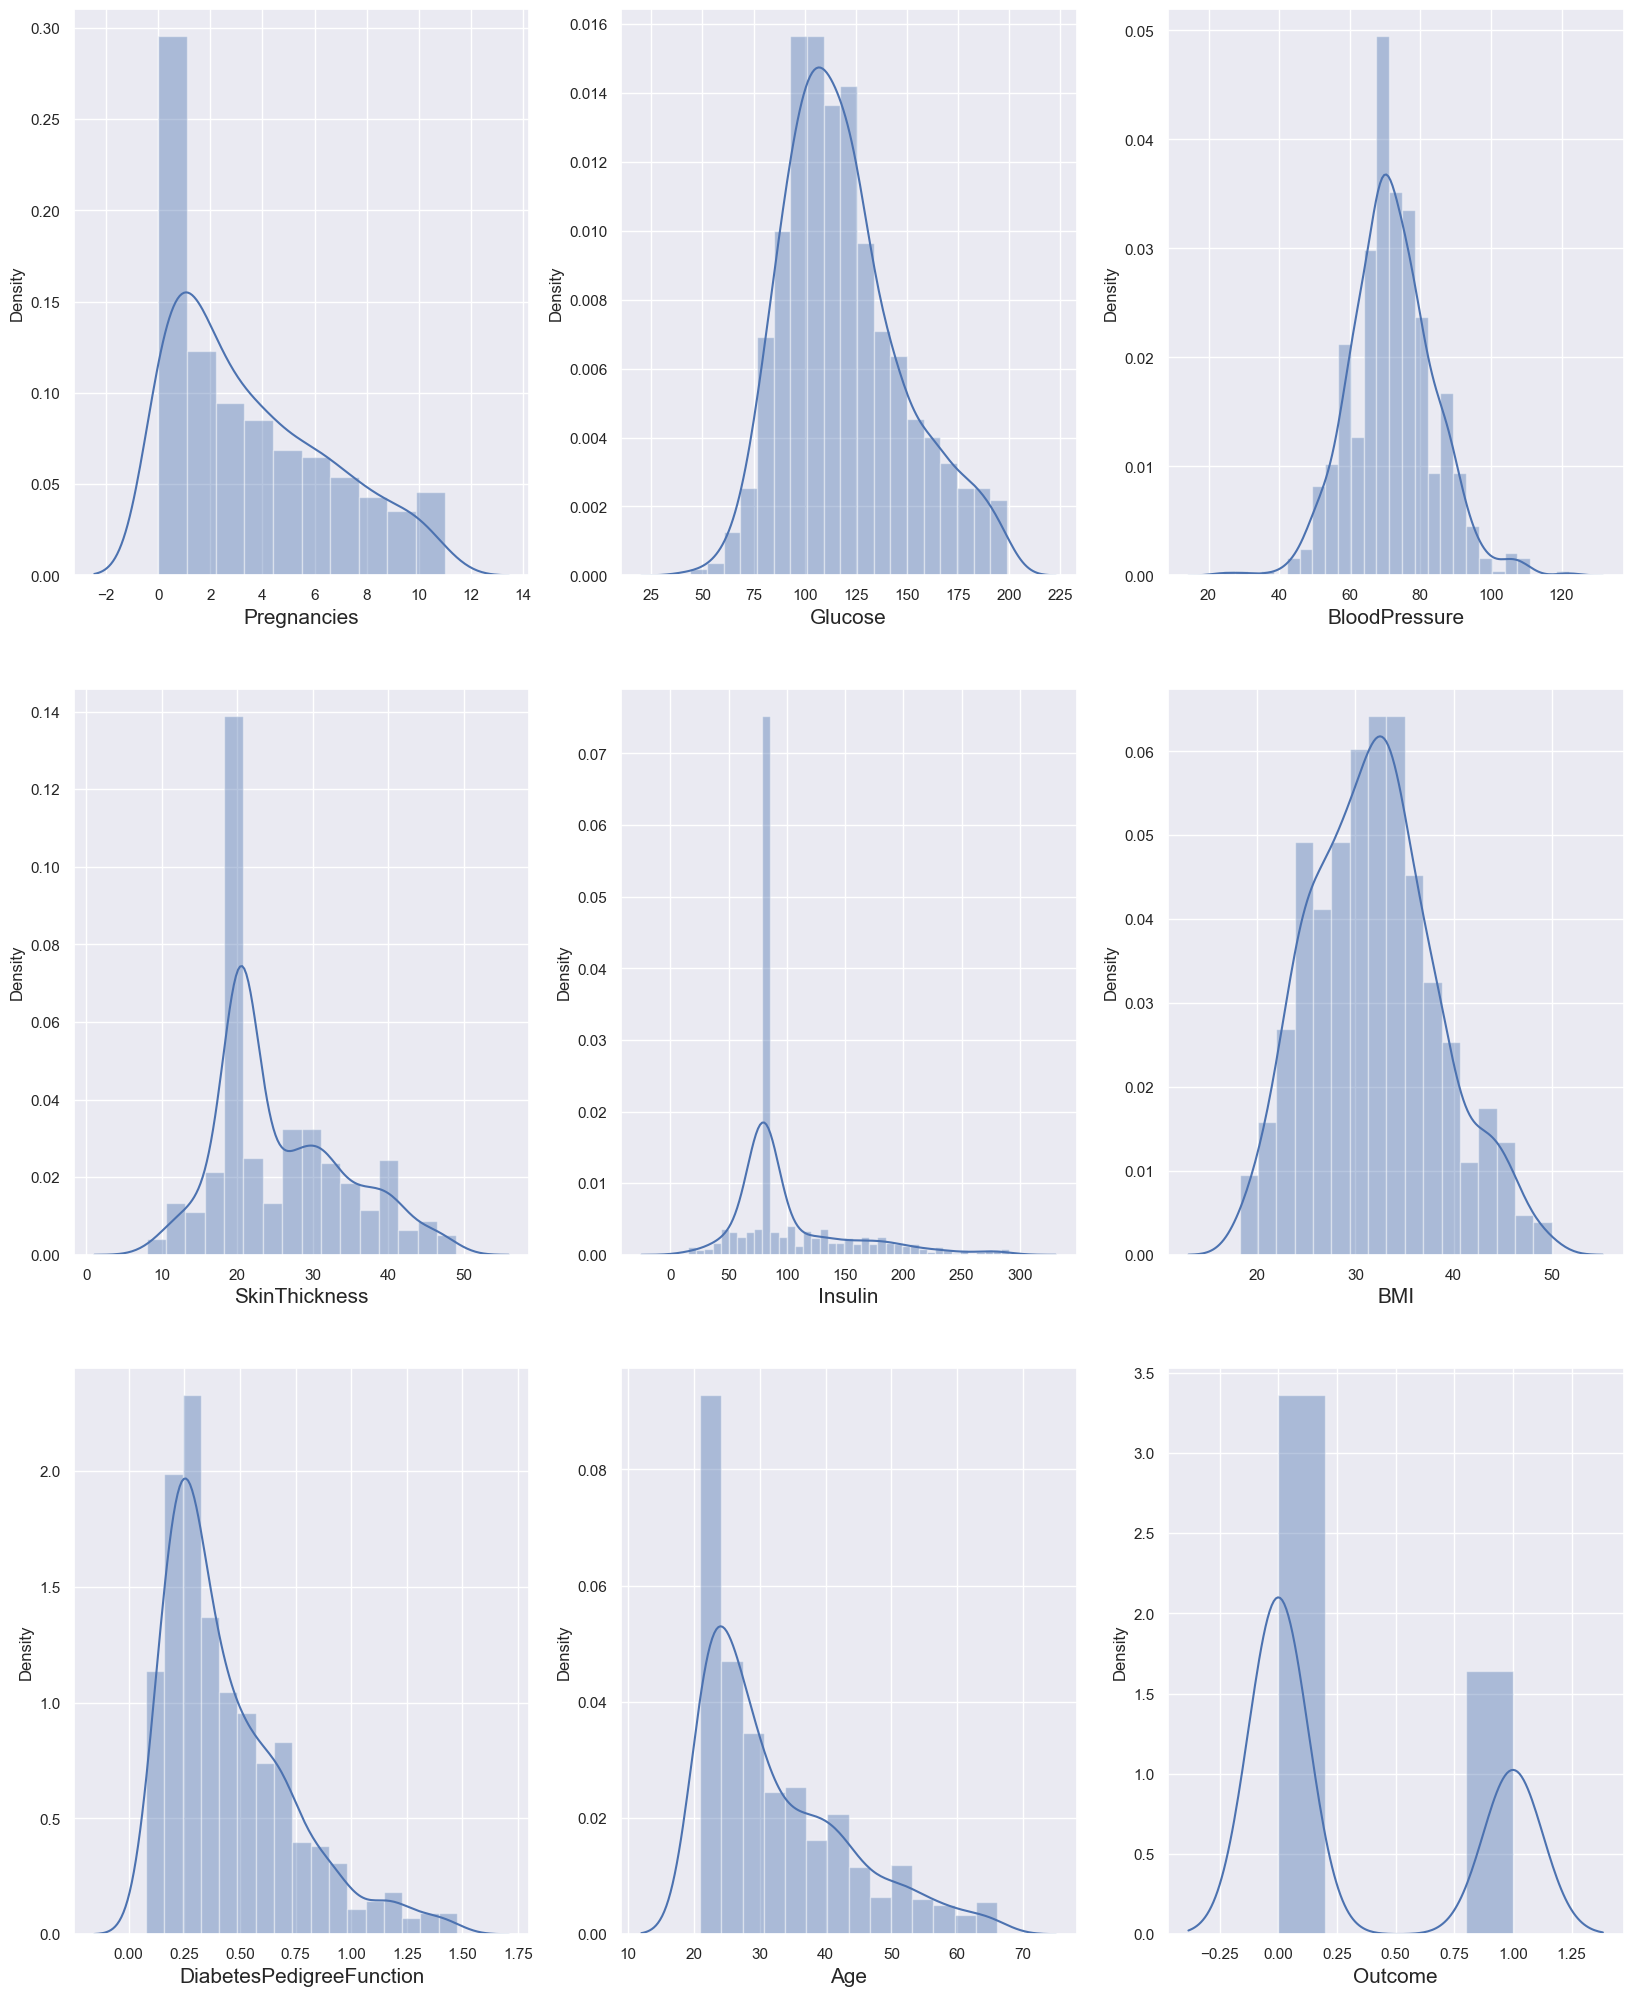

In [17]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

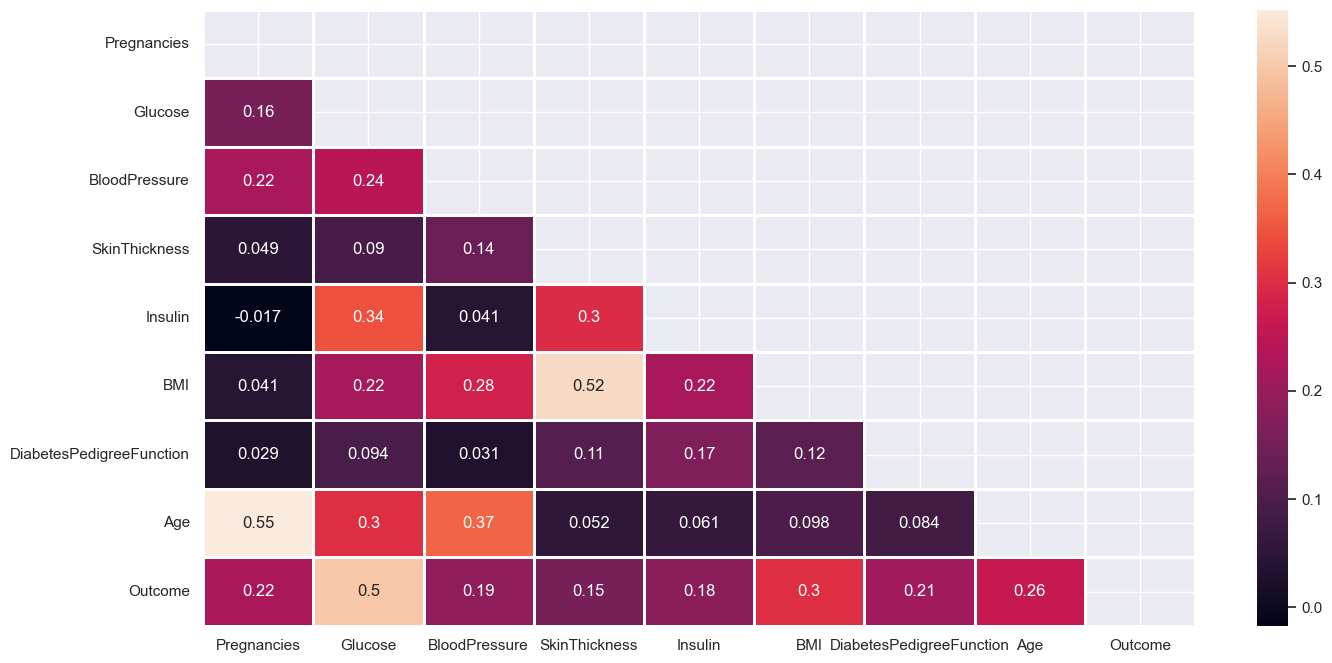

In [18]:
plt.figure(figsize = (16, 8))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [19]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Splitting the data into testing and training data.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model1 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_train_acc

0.805940594059406

In [28]:
lr_test_acc = accuracy_score(y_test, y_pred)
lr_test_acc

0.7751479289940828

In [29]:
confusion_matrix(y_test, y_pred)

array([[106,  11],
       [ 27,  25]], dtype=int64)

In [30]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.91      0.85       117\n           1       0.69      0.48      0.57        52\n\n    accuracy                           0.78       169\n   macro avg       0.75      0.69      0.71       169\nweighted avg       0.77      0.78      0.76       169\n'

# Model2 KNN classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_train_acc

0.8376237623762376

In [36]:
knn_test_acc = accuracy_score(y_test, y_pred)
knn_test_acc

0.7514792899408284

In [37]:
classification_report(y_test, y_pred)
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

# Model3 Support vector Classifier

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()

In [40]:
svc.fit(X_train, y_train)

SVC()

In [41]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_train_acc

0.8534653465346534

In [43]:
svc_test_acc = accuracy_score(y_test, y_pred)
svc_test_acc

0.7633136094674556

In [44]:
confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 24,  28]], dtype=int64)

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       117\n           1       0.64      0.54      0.58        52\n\n    accuracy                           0.76       169\n   macro avg       0.72      0.70      0.71       169\nweighted avg       0.76      0.76      0.76       169\n'

# Model4 Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()

In [48]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dtc.predict(X_test)

In [50]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_train_acc

1.0

In [51]:
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_acc

0.6982248520710059

In [52]:
confusion_matrix(y_test, y_pred)

array([[90, 27],
       [24, 28]], dtype=int64)

In [53]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.77      0.78       117\n           1       0.51      0.54      0.52        52\n\n    accuracy                           0.70       169\n   macro avg       0.65      0.65      0.65       169\nweighted avg       0.70      0.70      0.70       169\n'

# Model5 Decision Tree

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

In [56]:
grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [58]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [59]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [60]:
grid_search.best_score_

0.7623762376237624

In [61]:
dtc = grid_search.best_estimator_

In [62]:
y_pred = dtc.predict(X_test)

In [63]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_train_acc

0.80990099009901

In [64]:
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_acc

0.7100591715976331

In [65]:
confusion_matrix(y_test, y_pred)

array([[85, 32],
       [17, 35]], dtype=int64)

# Model6 Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)

In [68]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=180)

In [69]:
y_pred = rand_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_train_acc

0.8118811881188119

In [71]:
rand_clf_test_acc = accuracy_score(y_test, y_pred)
rand_clf_test_acc

0.7751479289940828

In [72]:
confusion_matrix(y_test, y_pred)

array([[109,   8],
       [ 30,  22]], dtype=int64)

In [73]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.93      0.85       117\n           1       0.73      0.42      0.54        52\n\n    accuracy                           0.78       169\n   macro avg       0.76      0.68      0.69       169\nweighted avg       0.77      0.78      0.75       169\n'

# Boosting

# Model7 Ada Boost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada = AdaBoostClassifier(base_estimator = dtc)

In [76]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [77]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)

In [78]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [79]:
GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [80]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 120}

In [81]:
grid_search.best_score_

0.7742574257425743

In [82]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)

In [83]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         min_samples_leaf=9),
                   learning_rate=0.001, n_estimators=120)

In [84]:
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_train_acc

0.80990099009901

In [85]:
ada_test_acc = accuracy_score(y_test, y_pred)
ada_test_acc

0.7751479289940828

In [86]:
confusion_matrix(y_test, y_pred)

array([[109,   8],
       [ 30,  22]], dtype=int64)

In [87]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.93      0.85       117\n           1       0.73      0.42      0.54        52\n\n    accuracy                           0.78       169\n   macro avg       0.76      0.68      0.69       169\nweighted avg       0.77      0.78      0.75       169\n'

# Model8 Gradient Boosting Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gb = GradientBoostingClassifier()

In [90]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

In [91]:
grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)

In [92]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [93]:
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [94]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 150}

In [95]:
grid_search.best_score_

0.7702970297029703

In [96]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)

In [97]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=150)

In [98]:
y_pred = gb.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [99]:
gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_train_acc

0.9801980198019802

In [100]:
gb_test_acc = accuracy_score(y_test, y_pred)
gb_test_acc

0.7869822485207101

In [101]:
confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 22,  30]], dtype=int64)

In [102]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       117\n           1       0.68      0.58      0.62        52\n\n    accuracy                           0.79       169\n   macro avg       0.75      0.73      0.74       169\nweighted avg       0.78      0.79      0.78       169\n'

# Model9 XGBoost

In [103]:
from xgboost import XGBClassifier

In [104]:
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)

In [105]:
xgb.fit(X_train, y_train)

[06:07:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.



XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [106]:
y_pred = xgb.predict(X_test)

In [107]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_train_acc

0.803960396039604

In [108]:
xgb_test_acc = accuracy_score(y_test, y_pred)
xgb_test_acc

0.7869822485207101

# Model10 Stacking

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [112]:
lr = LogisticRegression()

In [113]:
lr.fit(X_train, y_train)

LogisticRegression()

In [114]:
svm = SVC()

In [115]:
svm.fit(X_train, y_train)

SVC()

In [116]:
predict_val1 = lr.predict(val_train)

In [117]:
predict_val2 = svm.predict(val_train)

In [118]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [119]:
predict_test1 = lr.predict(X_test)

In [120]:
predict_test2 = svm.predict(X_test)

In [121]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [122]:
rand_clf = RandomForestClassifier()

In [123]:
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [124]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
stacking_acc

0.8235294117647058

In [125]:
confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 7, 13]], dtype=int64)

In [126]:
classification_report(y_test, rand_clf.predict(predict_test))

'              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88        48\n           1       0.72      0.65      0.68        20\n\n    accuracy                           0.82        68\n   macro avg       0.79      0.77      0.78        68\nweighted avg       0.82      0.82      0.82        68\n'

In [127]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'XgBoost', 'Stacking']

In [128]:
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, xgb_test_acc, stacking_acc]

In [129]:
models = pd.DataFrame({'Model' : models, 'Score' : scores})

In [130]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Stacking,0.823529
6,Gradient Boosting,0.786982
7,XgBoost,0.786982
0,Logistic Regression,0.775148
4,Random Forest,0.775148
5,Ada Boost,0.775148
2,SVC,0.763314
1,KNN,0.751479
3,Decision Tree,0.710059


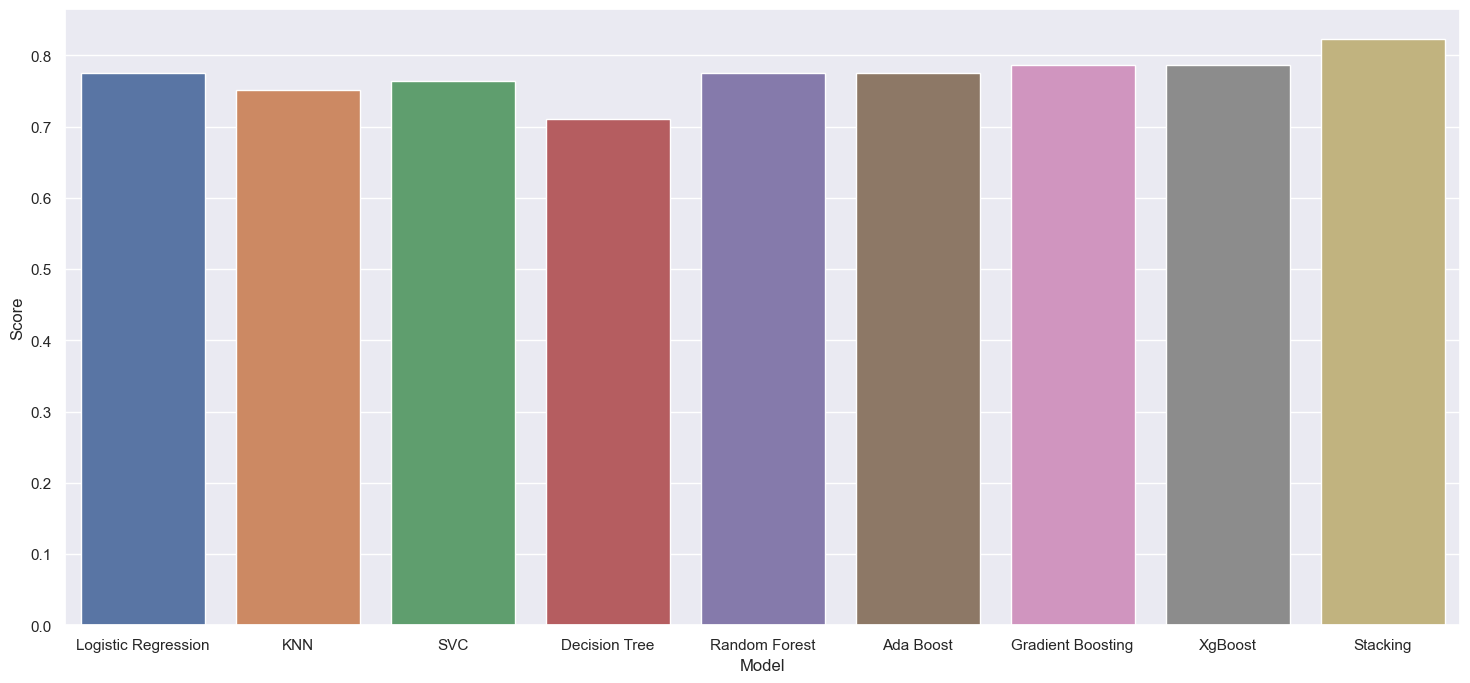

In [131]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

Stacking model provides the best model